### 2. Random Sample Imputation

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('titanic.csv', usecols=['Age','Survived','Fare'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [4]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [6]:
df['Age'].isnull().sum()

177

In [12]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
595    36.00
637    31.00
54     65.00
456    65.00
110    47.00
287    22.00
315    26.00
691     4.00
811    39.00
861    21.00
15     55.00
239    33.00
644     0.75
394    24.00
795    39.00
131    20.00
346    40.00
9      14.00
477    29.00
606    30.00
469     0.75
325    36.00
72     21.00
724    27.00
40     40.00
       ...  
396    31.00
452    30.00
395    22.00
882    22.00
821    27.00
314    43.00
622    20.00
204    18.00
60     22.00
731    11.00
81     29.00
676    24.50
433    17.00
378    20.00
174    56.00
624    21.00
642     2.00
157    30.00
427    19.00
698    49.00
179    36.00
24      8.00
630    80.00
458    50.00
49     18.00
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [13]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ## Random Sample to fill na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ## Need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+"_random"]=random_sample

In [14]:
median=df.Age.median()
median

28.0

In [15]:
impute_nan(df,'Age',median)

In [19]:
df.head(20)

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.00
1,1,38.0,71.2833,38.0,38.00
2,1,26.0,7.9250,26.0,26.00
3,1,35.0,53.1000,35.0,35.00
4,0,35.0,8.0500,35.0,35.00
5,0,NaN,8.4583,28.0,28.00
6,0,54.0,51.8625,54.0,54.00
7,0,2.0,21.0750,2.0,2.00
8,1,27.0,11.1333,27.0,27.00
9,1,14.0,30.0708,14.0,14.00


In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

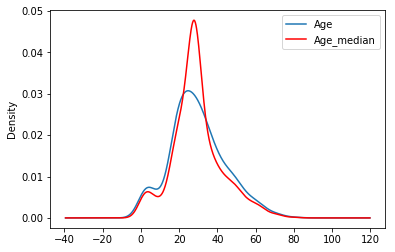

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df['Age_median'].plot(kind='kde',ax=ax,color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

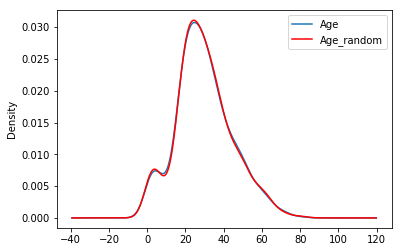

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df['Age_random'].plot(kind='kde',ax=ax,color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

#### Advantage
1. Easy to implement
2. Less distortion in Variance

#### Disadvantage
1. Every situation randomness won't work.

### 3. Capturing NAN values with a new feature

In [24]:
df=pd.read_csv('titanic.csv', usecols=['Age','Survived','Fare'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [25]:
df['Age_NaN'] = np.where(df['Age'].isnull(),1,0)

In [26]:
df.head()

,Survived,Age,Fare,Age_NaN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [27]:
df.Age.median()

28.0

In [29]:
## This is fill the NaN values with median of the Age data

df['Age'].fillna(df.Age.median(),inplace=True)

In [30]:
df.head(10)

,Survived,Age,Fare,Age_NaN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


#### Advantage
1. Easy to implement
2. Captures the importance of data

#### Disadvantage
1. Creating addition features(Curse of Dimensionality)

### 4. End of Distribution Imputation

In [31]:
df=pd.read_csv('titanic.csv', usecols=['Age','Survived','Fare'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


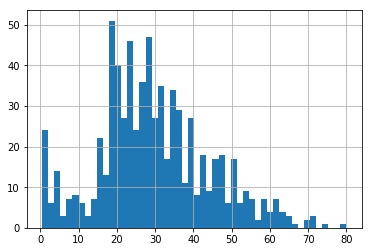

In [32]:
df.Age.hist(bins=50)

In [36]:
extreme=df.Age.mean()+3*df.Age.std()

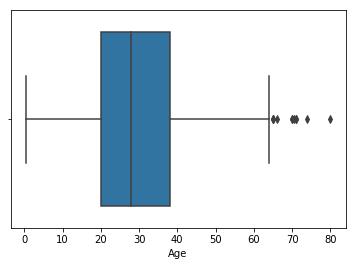

In [37]:
import seaborn as sns
sns.boxplot('Age',data=df)

In [38]:
def impute_nan(data,variable,median,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [39]:
impute_nan(df,'Age',df.Age.median(),extreme)

In [41]:
df.head(10)

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


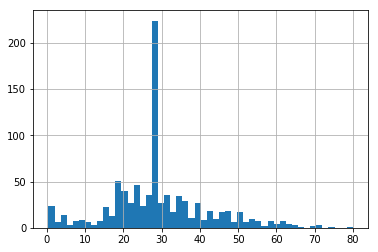

In [42]:
df.Age.hist(bins=50)

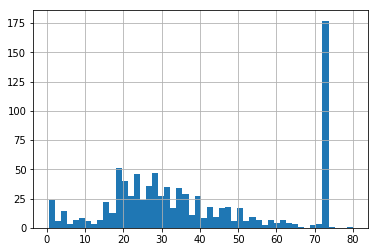

In [43]:
df.Age_end_distribution.hist(bins=50)

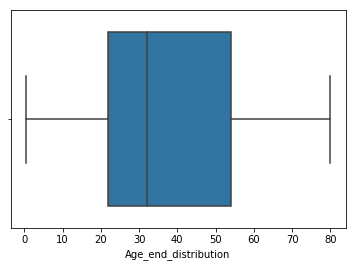

In [44]:
sns.boxplot('Age_end_distribution',data=df)